In [1]:
import xdesign as xd
import numpy as np
import matplotlib.pyplot as plt
import os
import tomopy

# Reconstruction Scaling Problem

## Introduction
The reconstructions are not returning predictions in the same range as the attenuation values.
Please investigate.

This notebook should be executed on branch `dev`.

## Data Acquisition

In [2]:
# Generate a simple phantom
p = xd.UnitCircle(material=xd.SimpleMaterial(mass_attenuation=1.0), radius=0.3)
# NOTE: the density of a SimpleMaterial defaults to 1.0

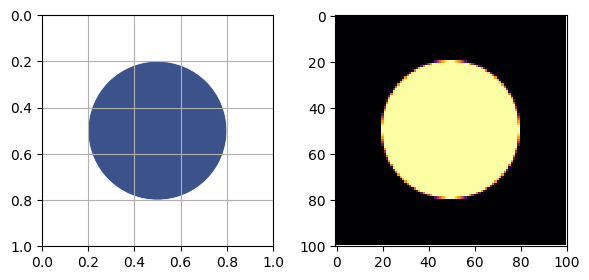

In [3]:
d = xd.sidebyside(p)
plt.show()

In [4]:
# generate a sinogram and normalize using -log and probe size
size = 100
sino, prb = xd.sinogram(size, size, p)
sino = -np.log(sino) / prb.size
sino = np.expand_dims(sino, 0)

/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -1.383213543704187e-10
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -1.4854745211678733e-10
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -9.889672414331585e-11
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -4.491368388315209e-11
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -3.0712543619415555e-11
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -2.522004827198998e-11
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: Run

/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -8.987255384340642e-12
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -8.845979504457091e-12
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -7.877587471227798e-12
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -1.1585787884627052e-11
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -1.4209855514479841e-11
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: RuntimeWarning: halfspacecirc was out of bounds, -1.3902767825868523e-11
  RuntimeWarning)
/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1393: Ru

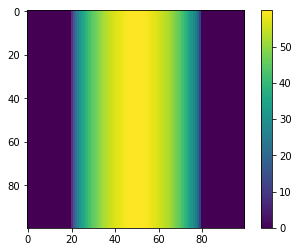

In [5]:
plt.imshow(sino[0,:,:])
plt.colorbar()
plt.show()

## Reconstruction

In [6]:
algorithms = ['gridrec', 'art', 'bart', 'fbp', 'osem', 'mlem', 'sirt']
theta = tomopy.angles(size)

In [7]:
recons = dict()
for algo in algorithms:
    recons[algo] = tomopy.recon(sino, theta, center=size/2, algorithm=algo,
                                sinogram_order=True)

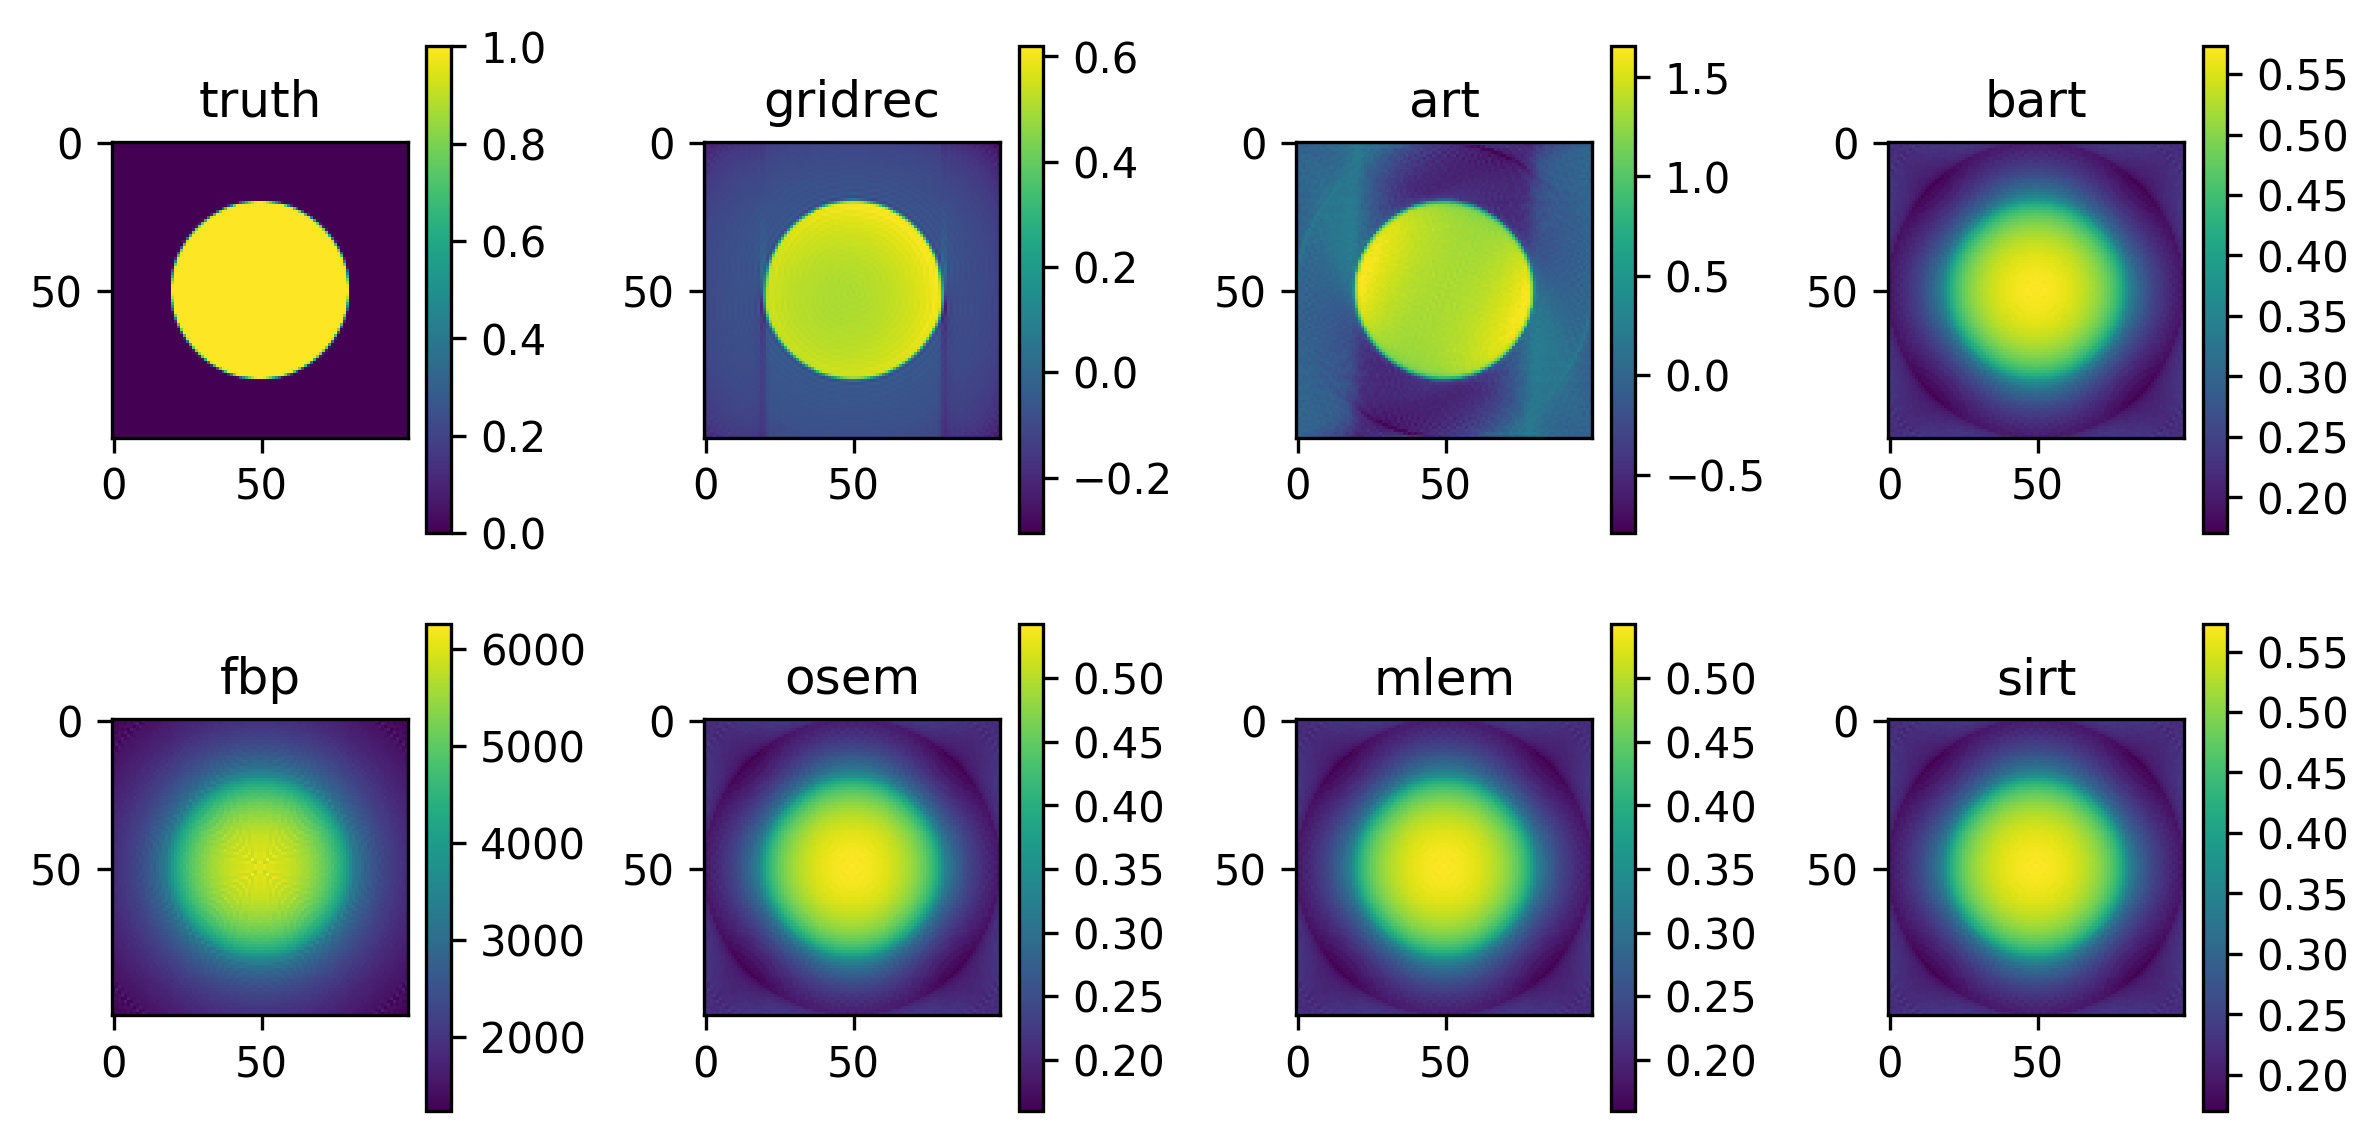

In [8]:
plt.figure(figsize=(8,4), dpi=300)

plt.subplot(2,4,1)
plt.imshow(d)
plt.title('truth')
plt.colorbar()

i = 2
for algo in algorithms:
    plt.subplot(2,4,i)
    plt.imshow(recons[algo][0,:,:])
    plt.title(algo)
    plt.colorbar()
#     plt.clim([0,1])
    i+=1

plt.tight_layout()
plt.show()

All of the reconstructed images above should look like the ground truth image.

## Appendix

In [9]:
import matplotlib
matplotlib.__version__

'2.0.2'